# Analysis of Car Features  🏎️ 👨‍💻

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/05/Importance-Of-Feature-Engineering-In-DataHack-Competitions.jpg">

# 1. Introduction

- The dataset aims to provide a comprehensive collection of car data for analysis and research purposes. It encompasses a wide range of car makes and models, allowing users to explore and analyze different aspects of the automotive industry.

- By leveraging this dataset, researchers and analysts can gain insights into car specifications, performance, and characteristics. They can study trends in fuel efficiency, engine power, and other attributes across different car manufacturers and model years.

- The dataset can also be used to build predictive models, develop recommendation systems, or conduct exploratory data analysis within the automotive domain.

# 2. Importing Libary

In [1]:
# Object manipulation
import statistics
import numpy as np
import pandas as pd
from collections import defaultdict

# Plot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns
%matplotlib inline
import plotly.offline as pyo
from matplotlib import *
from matplotlib import cm
print("✅ Libaries import successfully")

✅ Libaries import successfully


##  2.1  Importing Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="__main__")
warnings.filterwarnings("ignore", category=PendingDeprecationWarning, module="__main__")

In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Your code here

# Reset warning filters (optional)
warnings.resetwarnings()


# 3. About Data

- Read Data
- Shape of data
- Head and tail
- Data info
- Data dtype
- Checking null values

#### With the help of these we can see a small overview of our dataset

## 3.1 Reading Data

In [4]:
df=pd.read_csv("/kaggle/input/cardataset/data.csv")

## 3.2 Shape of DataFrame

In [5]:
df.shape

(11914, 16)

## 3.4 Head and Tail

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## 3.5 DataFrame Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## 3.5 Data types of each column

In [9]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## 3.6 Checking null values

In [10]:
round(df.isnull().sum()*100/len(df),2)

Make                  0.00
Model                 0.00
Year                  0.00
Engine Fuel Type      0.03
Engine HP             0.58
Engine Cylinders      0.25
Transmission Type     0.00
Driven_Wheels         0.00
Number of Doors       0.05
Market Category      31.41
Vehicle Size          0.00
Vehicle Style         0.00
highway MPG           0.00
city mpg              0.00
Popularity            0.00
MSRP                  0.00
dtype: float64

### As we can see there are 31.41% null values in **Market Category** so we can fill these null values with respect to there company's other model's market category


## 3.7 Checking duplicate values

In [11]:
df.duplicated().sum()

715

#### In this dataset there are 715 duplicate values which is less than 1% of our data. So I am decide to keep the null values

## 3.8 Changing Columns name

In [12]:
df.rename(columns={"Make": "Company", "MSRP": "Price"}, inplace=True)

# 4. Exploratory Data Analysis (EDA)

## 4.1 The dataset provides the number of cars available for each individual company.

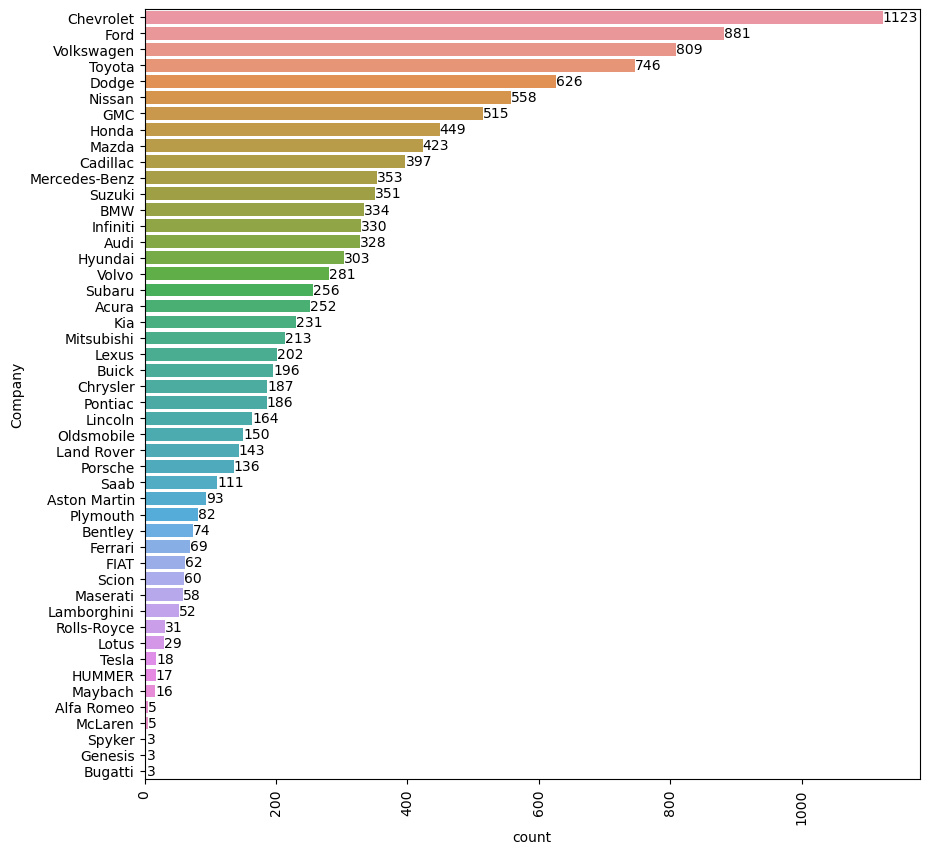

In [13]:
plt.figure(figsize=(10,10))
df_make=df["Company"].value_counts()
ax = sns.countplot(data=df,y="Company",order=df_make.index)
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

- The chart provides a visual representation of the number of vehicles associated with each company. It allows you to observe the relative sizes of different companies in terms of the count of vehicles.
- You can easily identify which companies have a higher or lower presence in the dataset based on the height of the bars. Companies with taller bars indicate a larger number of vehicles, while shorter bars indicate a smaller number.
- The ordering of the companies on the y-axis can provide insights into their popularity or market presence. Companies with higher bars and positioned towards the top of the chart may have a larger market share or be more well-known.
- The labels on top of each bar provide the exact count of vehicles for each company, allowing for precise comparisons.


## 4.2 The average price exhibits variation across different vehicle styles and vehicle sizes.

In [14]:
df_p=df["Price"].value_counts()
df_p

2000     1036
29995      19
25995      19
20995      16
27995      16
         ... 
18855       1
22575       1
20050       1
26965       1
50920       1
Name: Price, Length: 6049, dtype: int64

In [15]:
df["Vehicle Size"].value_counts()

Compact    4764
Midsize    4373
Large      2777
Name: Vehicle Size, dtype: int64

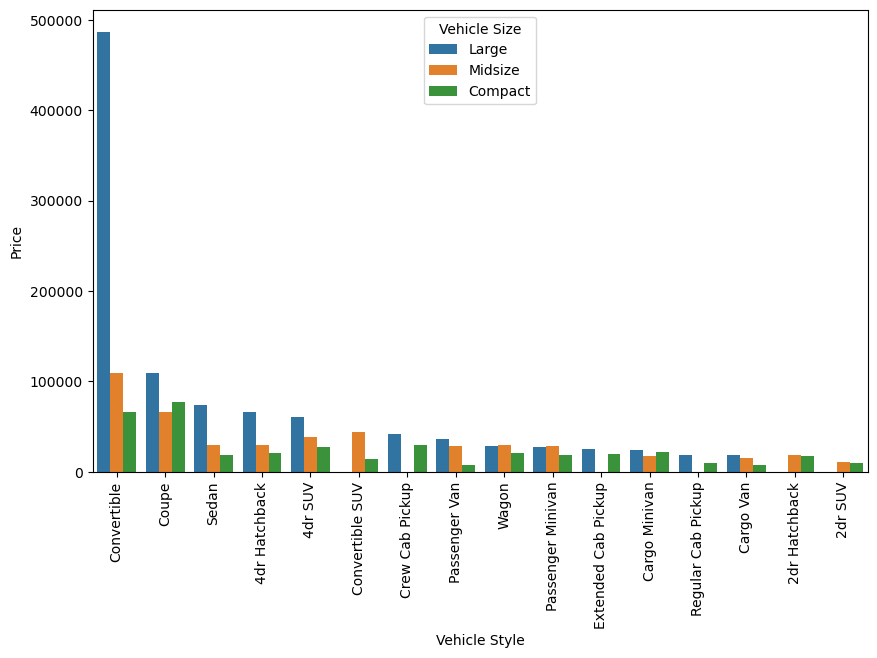

In [16]:
plt.figure(figsize=(10,6))
sns.color_palette("Set2")
df_1=df.groupby(["Vehicle Style","Vehicle Size"])["Price"].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=df_1, x="Vehicle Style",y="Price",hue="Vehicle Size")
plt.xticks(rotation=90)
plt.show()

**The bar plot shows the average prices of different vehicle styles based on their sizes. Here are the key observations from the plot:**

- The plot provides a visual representation of the average prices of various vehicle styles.
- The vehicle styles are categorized based on their sizes, which are represented by different colors in the plot.
- The vertical bars depict the average prices of each vehicle style within its corresponding size category.
- The x-axis labels show the different vehicle styles, and they are rotated by 90 degrees to improve readability.
- By comparing the heights of the bars, you can identify the relative differences in average prices among the vehicle styles.

## 4.3 The variation in car companies can be observed across different vehicle styles and vehicle sizes.

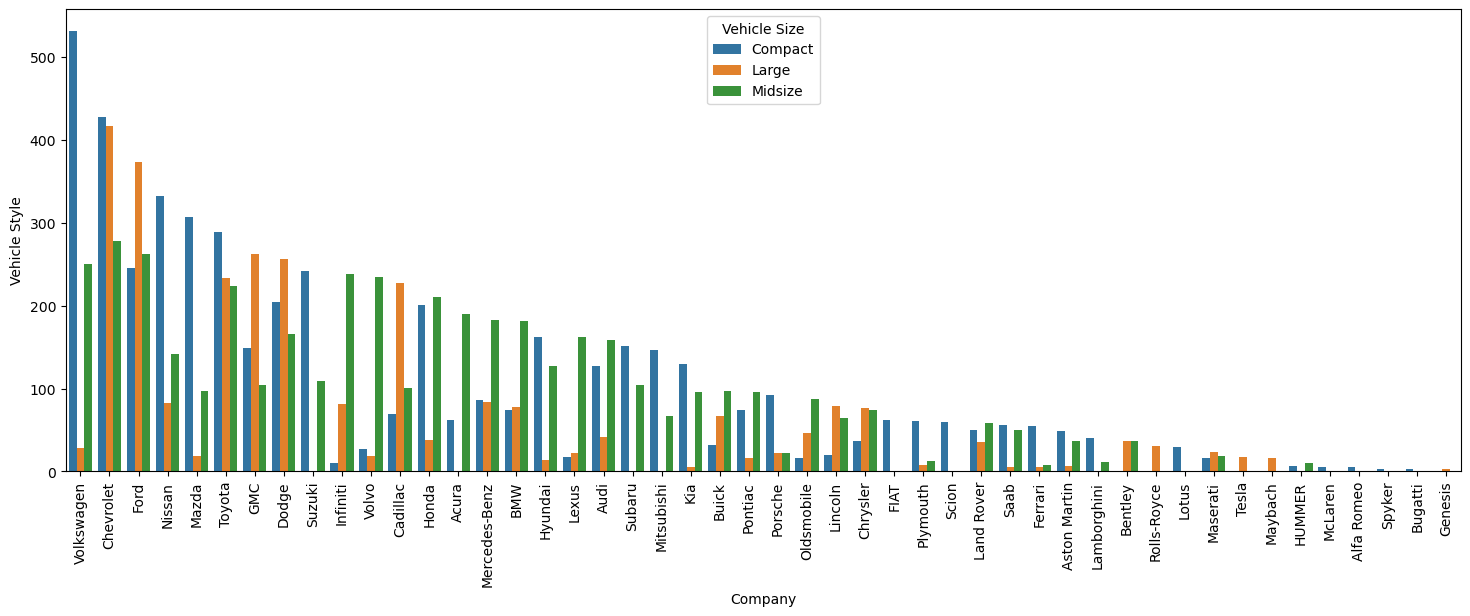

In [17]:
plt.figure(figsize=(18,6))
df_1=df.groupby(["Company","Vehicle Size"])["Vehicle Style"].count().reset_index()

sns.barplot(data=df_1.sort_values(by="Vehicle Style",ascending=False), x="Company",y="Vehicle Style",hue="Vehicle Size")
plt.xticks(rotation=90)
plt.show()

#### The resulting bar plot provides insights into the distribution of vehicle styles across different car companies and vehicle sizes. Here's what you can gather from the plot:

- Each bar represents a car company, and the height of the bar indicates the count of vehicle styles associated with that company.
- The bars are grouped and colored based on the vehicle size category, allowing for easy visual comparison between different sizes.
- The x-axis displays the car companies' names, and it is rotated by 90 degrees to prevent overlapping of the labels.
- The legend shows the vehicle size categories and their corresponding colors.

## 4.4 The distribution of vehicle styles for the top 20 car companies, categorized by vehicle size

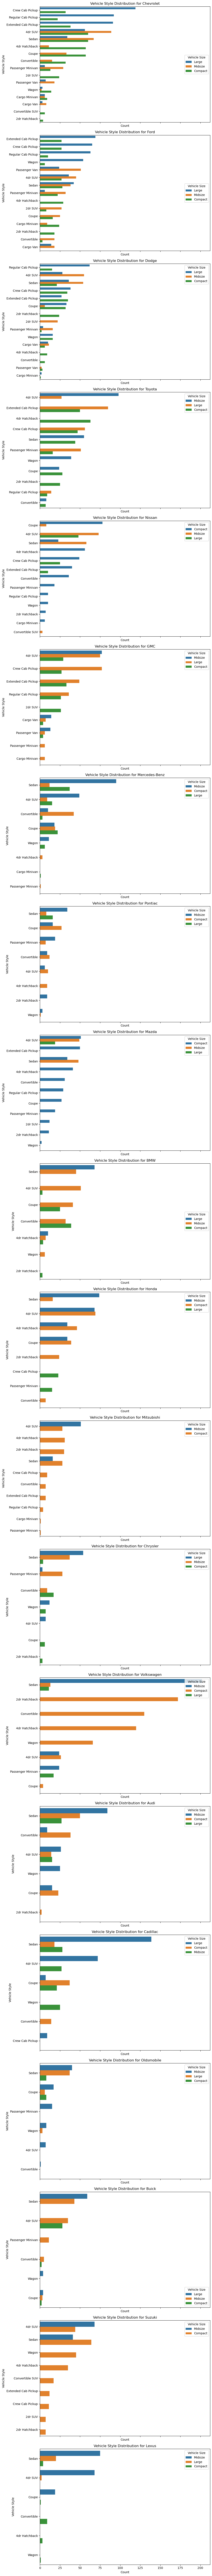

In [18]:
df_1 = df.groupby(["Company", "Vehicle Size", "Vehicle Style"])["Vehicle Style"].count().sort_values(ascending=False)


df_a = df_1.reset_index(name="Count")


top_20_companies = df_a['Company'].value_counts().head(20).index


df_top_20 = df_a[df_a['Company'].isin(top_20_companies)]


num_companies = len(top_20_companies)
fig, axes = plt.subplots(num_companies, 1, figsize=(10, 6*num_companies), sharex=True)

for i, company in enumerate(top_20_companies):
    data = df_top_20[df_top_20['Company'] == company]
    ax = axes[i]
    color=sns.color_palette("crest")
    sns.barplot(data=data, y="Vehicle Style", hue="Vehicle Size", x="Count", ax=ax)
    ax.set_title(f"Vehicle Style Distribution for {company}")
    ax.set_ylabel("Vehicle Style")
    ax.legend(title="Vehicle Size")
    ax.set_xlabel("Count")

plt.tight_layout()

plt.show()

### The code provided generates subplots of bar plots showing the distribution of vehicle styles for the top 20 car companies, categorized by vehicle size. Here's a summary of the result:

- The subplots are arranged vertically, with each subplot representing a specific car company from the top 15 companies based on the count of vehicle styles.
- The x-axis represents the count of vehicle styles, indicated by the bar lengths in each subplot.
- The y-axis represents the vehicle styles, with each bar representing a specific vehicle style.
- The bars within each subplot are grouped and colored based on the vehicle size category, allowing for easy visual comparison.
- The title of each subplot displays the company name, indicating which company's vehicle style distribution is being shown.
- The legends in each subplot provide a title for the vehicle size category and indicate the corresponding colors used in the plot.

## 4.5 The distribution of market categories varies across different vehicle styles, showcasing the prevalence of specific market categories within each style.

In [19]:
df["Market Category"].value_counts()


Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: Market Category, Length: 71, dtype: int64

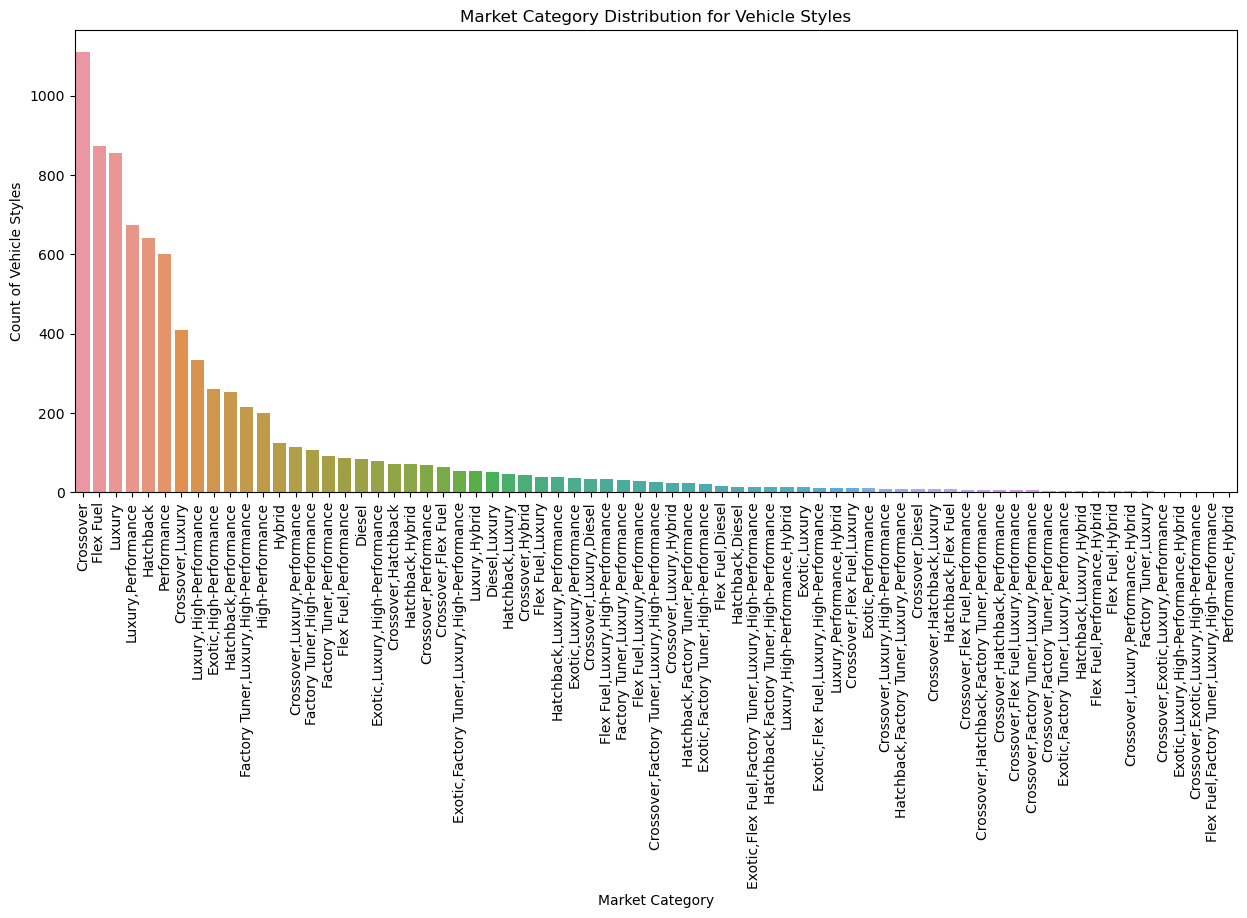

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x="Market Category", order=df["Market Category"].value_counts().index)
plt.title("Market Category Distribution for Vehicle Styles")
plt.xlabel("Market Category")
plt.ylabel("Count of Vehicle Styles")
plt.xticks(rotation=90)
plt.show()

#### The code provided generates a countplot to visualize the distribution of market categories for vehicle styles. Here's a summary of the result:

- The countplot displays the market categories on the x-axis and the count of vehicle styles on the y-axis.
- The market categories are arranged in ascending order based on their counts, allowing for easy comparison of the distribution.
- The title of the plot is set as "Market Category Distribution for Vehicle Styles."
- The x-axis label is "Market Category," and the y-axis label is "Count of Vehicle Styles."
- The x-axis tick labels are rotated by 90 degrees for better readability when there are many categories.

## 4.6 The distribution of market categories varies based on the count of unique vehicle styles within each category, providing insights into the diversity of vehicle styles associated with each market category

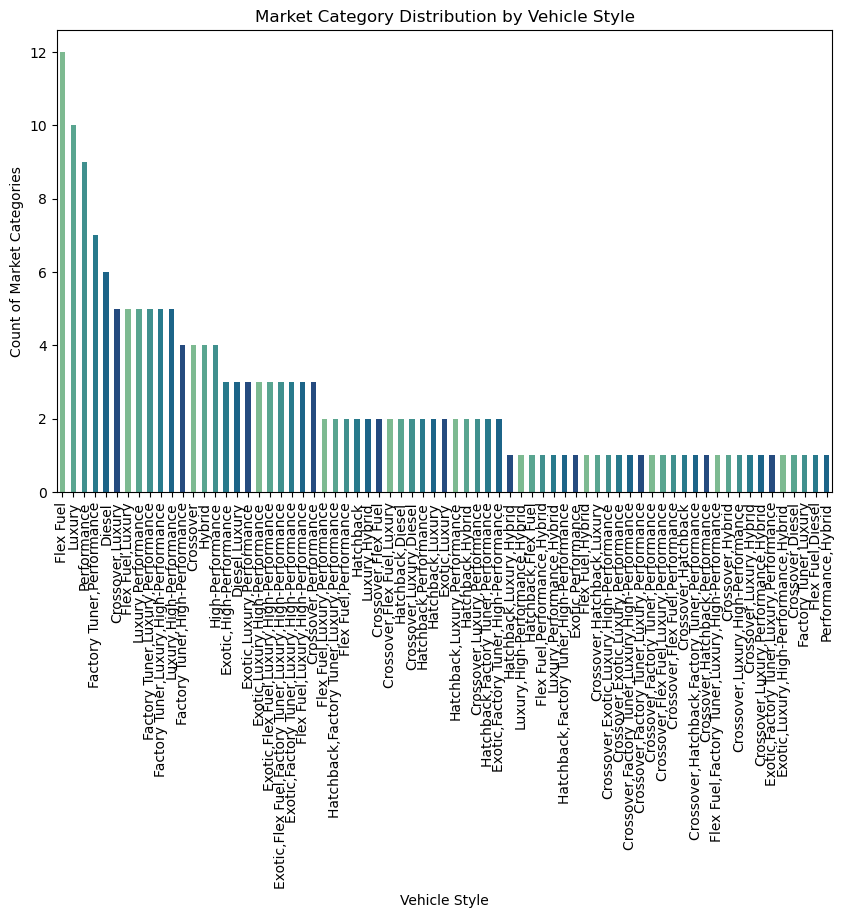

In [21]:
data = df.groupby("Market Category")["Vehicle Style"].nunique().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.color_palette("crest", as_cmap=True)
data.plot(kind='bar', color=sns.color_palette("crest"))

plt.title("Market Category Distribution by Vehicle Style")
plt.xlabel("Vehicle Style")
plt.ylabel("Count of Market Categories")
plt.xticks(rotation=90)
plt.show()

#### The bar plot you generated shows the distribution of market categories based on the count of unique vehicle styles. Here's a more detailed summary:

- The bar plot provides a visual representation of the relationship between market categories and the count of unique vehicle styles within each category.
- The y-axis represents the count of market categories, indicating how many different categories exist.
- The x-axis represents the vehicle styles, showing the various types of vehicle styles present in the dataset.
- Each bar in the plot corresponds to a specific vehicle style and its height represents the number of market categories associated with that style.
- The bars are colored using the "crest" color palette from seaborn, providing a visually appealing and distinct color scheme.
- The title of the plot is "Market Category Distribution by Vehicle Style," clearly indicating the purpose of the visualization.

## 4.7 The average prices of cars over different years and identify any trends or patterns. Determine if prices have increased or decreased over time and look for any factors that may have influenced these trends.

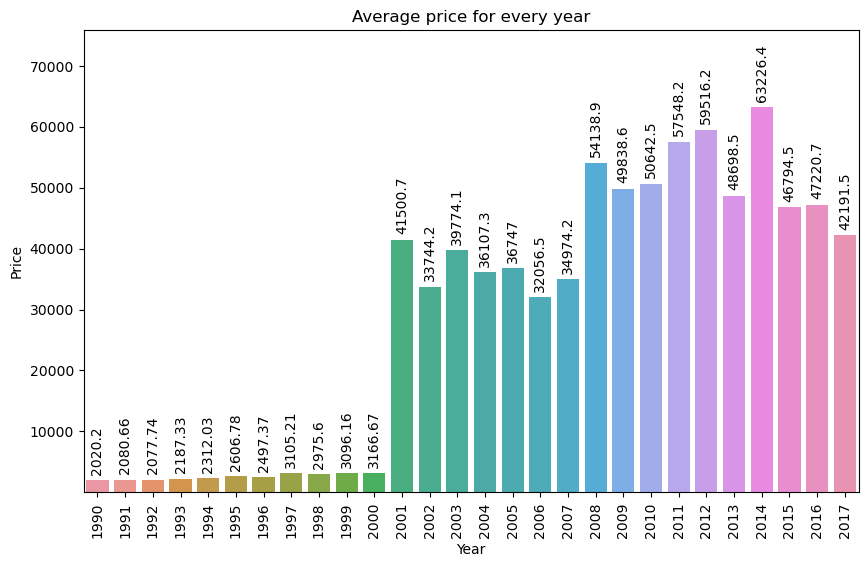

In [22]:
df_temp=round(df.groupby("Year")["Price"].mean().reset_index(),2)
plt.figure(figsize=(10,6))

ax=sns.barplot(data=df_temp,x="Year", y="Price")
for label in ax.containers:
    ax.bar_label(label,label_type="edge",rotation=90,padding=4)
    
plt.title("Average price for every year")
plt.xticks(rotation=90)
plt.ylim(5, max(df_temp["Price"]) * 1.2)
plt.show()

- The result of the code is a summary of the average price of cars for each year in the dataset. It provides insights into the pricing trends over time and allows for comparisons between different years.
- By grouping the dataset by the "Year" column and calculating the mean of the "Price" column, we obtain the average price for each year. The resulting dataframe, df_temp, contains two columns: "Year" and "Price".
- The code then creates a bar plot using sns.barplot(), where the x-axis represents the years and the y-axis represents the average prices. The bars correspond to the average prices for each year, and the height of each bar indicates the average price value.

## 4.8 Over time, the dominance of car manufacturers varied, with different companies leading in different years.

In [23]:
df_max_company = df.groupby(["Year", "Company"]).size().reset_index(name="Count")
max_company_per_year = df_max_company.loc[df_max_company.groupby("Year")["Count"].idxmax()]
max_company_per_year

,Year,Company,Count
7,1990,GMC,25
26,1991,Dodge,48
47,1992,Dodge,57
69,1993,Dodge,51
90,1994,Chevrolet,26
132,1995,Toyota,21
141,1996,Ford,21
162,1997,Ford,34
183,1998,Chevrolet,37
207,1999,Ford,22


<function matplotlib.pyplot.show(close=None, block=None)>

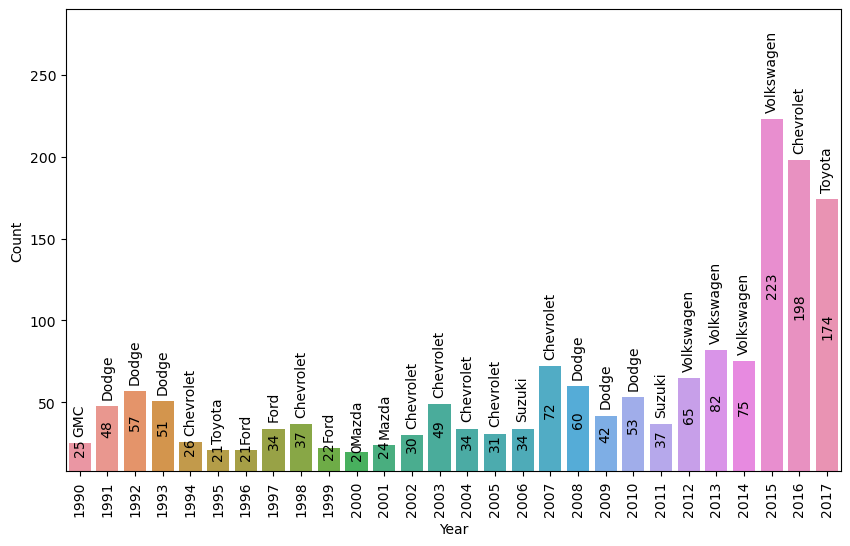

In [24]:
plt.figure(figsize=(10,6))
df_max_company = df.groupby(["Year", "Company"]).size().reset_index(name="Count")
max_count_per_year = df_max_company.groupby("Year")["Count"].max()
max_company_per_year = df_max_company.loc[df_max_company.groupby("Year")["Count"].idxmax()]
ax=sns.barplot(data=max_company_per_year, x="Year", y="Count")
for label in ax.containers:
    ax.bar_label(label,label_type="center",rotation=90,padding=7)
for label in ax.containers:
    ax.bar_label(label, labels=max_company_per_year["Company"],label_type="edge",rotation=90,padding=5)
plt.ylim(8, max(max_company_per_year["Count"]) * 1.3)
plt.xticks(rotation=90)
plt.show

- The output of this code is a bar plot that shows the company with the maximum count of cars for each year. The x-axis represents the years, and the y-axis represents the count of cars.
- Each bar in the plot represents a specific year, and the height of the bar corresponds to the count of cars for the company with the maximum count in that year. The company name is not displayed directly on the bars but can be inferred from the code.

## 4.9  The distribution of car models vary for Volkswagen in 2015, Chevrolet in 2016, and Toyota in 2017(this is only for last 3 years)

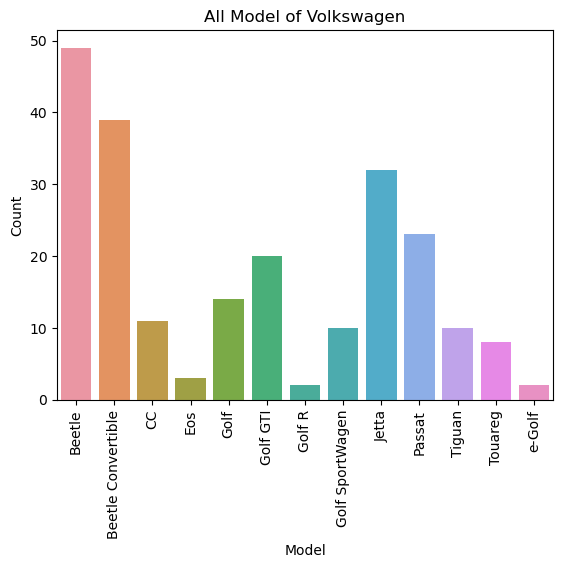

In [25]:
mask=df[(df["Company"]=="Volkswagen") & (df["Year"]== 2015)]
data=mask.groupby(["Company","Model"]).size().reset_index(name="Count")
sns.barplot(data=data,x="Model",y="Count")
plt.xticks(rotation=90)
plt.title("All Model of Volkswagen")
plt.show()

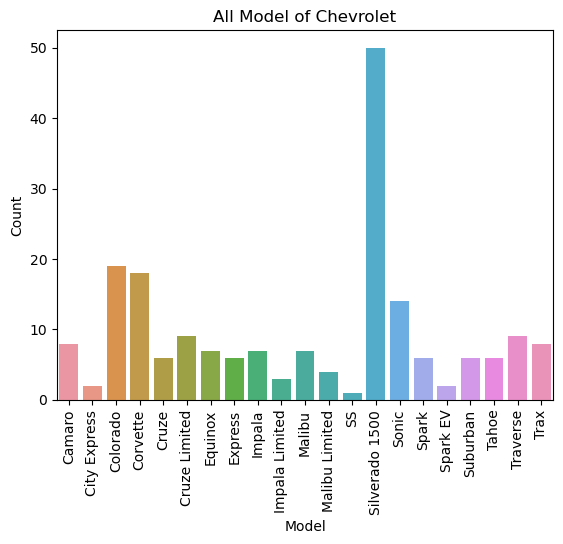

In [26]:
mask=df[(df["Company"]=="Chevrolet") & (df["Year"]== 2016)]
data=mask.groupby(["Company","Model"]).size().reset_index(name="Count")
sns.barplot(data=data,x="Model",y="Count")
plt.xticks(rotation=90)
plt.title("All Model of Chevrolet")
plt.show()

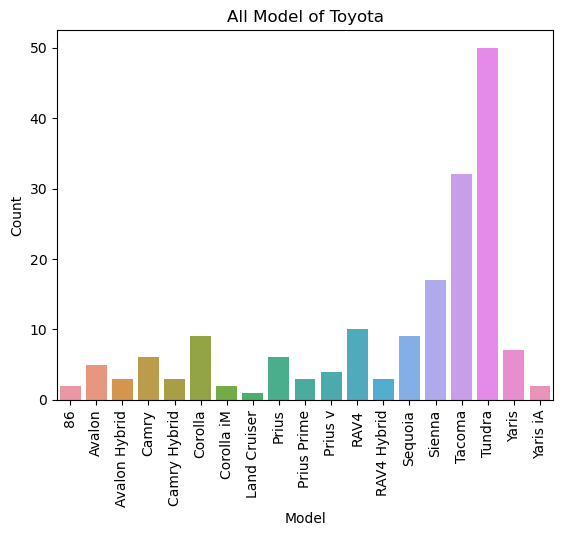

In [27]:
mask=df[(df["Company"]=="Toyota") & (df["Year"]== 2017)]
data=mask.groupby(["Company","Model"]).size().reset_index(name="Count")
sns.barplot(data=data,x="Model",y="Count")
plt.xticks(rotation=90)
plt.title("All Model of Toyota")
plt.show()

**The bar plots show the distribution of car models for different companies (Volkswagen, Chevrolet, and Toyota) and years (2015, 2016, and 2017). Here is a summary of the output:**
- For Volkswagen in 2015: The bar plot displays the count of each car model for Volkswagen in 2015. The x-axis represents the car models, and the y-axis represents the count. The plot provides insights into the popularity or prevalence of different car models within the Volkswagen brand in 2015.
- For Chevrolet in 2016: The bar plot shows the count of car models for Chevrolet in 2016. Similar to the previous plot, the x-axis represents the car models, and the y-axis represents the count. This plot helps to understand the distribution of car models specific to Chevrolet in 2016.
- For Toyota in 2017: The bar plot illustrates the count of car models for Toyota in 2017. Once again, the x-axis represents the car models, and the y-axis represents the count. This plot allows us to observe the distribution of car models within the Toyota brand in 2017.

## 4.10 The correlations between different numerical features in the dataset

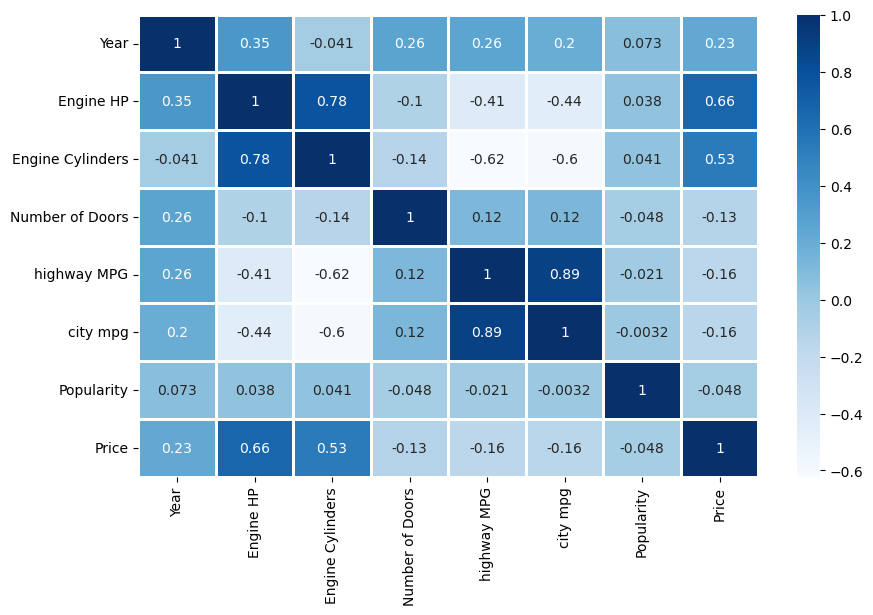

In [28]:
mask=df.dtypes[df.dtypes!=object]
data=df[mask.index].corr()
plt.figure(figsize=(10,6))
sns.heatmap(data=data,annot=True,cmap="Blues",linewidth=.8)
plt.show()

- Darker shades or higher values indicate a stronger positive correlation, meaning that as one variable increases, the other tends to increase as well.
- Lighter shades or lower values indicate a stronger negative correlation, meaning that as one variable increases, the other tends to decrease.
- A value of 1 indicates a perfect positive correlation, while a value of -1 indicates a perfect negative correlation. A value of 0 indicates no correlation.

 **High correlation between**
- Engine cylinders & Engine HP
- highway mpg & City mpg

   **The more cylinders there are, the more poverful the car is.**

 **High anticorrelation**
 - Engine cylinders & highway mpg
 
**Highway mpg / Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.**

## 4.11 The distribution of price vary across different variables in the dataset, as depicted by the box plots

In [29]:
mask_1= df.dtypes[df.dtypes != object]
mask_1

Year                  int64
Engine HP           float64
Engine Cylinders    float64
Number of Doors     float64
highway MPG           int64
city mpg              int64
Popularity            int64
Price                 int64
dtype: object

In [30]:
mask_1.drop("Number of Doors", inplace=True, axis=0)
mask_1

Year                  int64
Engine HP           float64
Engine Cylinders    float64
highway MPG           int64
city mpg              int64
Popularity            int64
Price                 int64
dtype: object

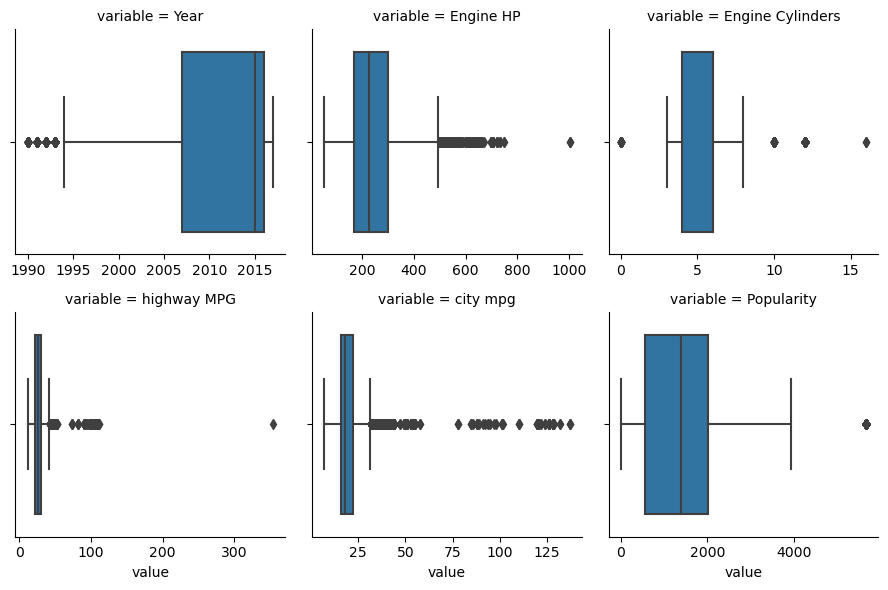

In [31]:
df_melted = pd.melt(df, id_vars="Price", value_vars=mask_1.index)
f=sns.FacetGrid(df_melted,col="variable",col_wrap=3, sharex=False,sharey=False)
f.map(sns.boxplot, 'value', order = mask_1.index)
plt.show()

**Box Plot: Each box plot displays the distribution of values for a particular variable. It consists of several components:**
- Box: The box represents the interquartile range (IQR) of the data, which contains the middle 50% of the values. The vertical line inside the box represents the median.
- Whiskers: The whiskers extend from the box and represent the range of values within a certain distance from the quartiles. By default, the whiskers extend to 1.5 times the IQR.
- Outliers: Points outside the whiskers are considered outliers and are plotted individually. They represent values that are significantly different from the rest of the data.

## 4.12 The proportion of different engine fuel types shift significantly between the two time periods.

Is fuel type proportion changing between all the previous years and the last three years ?

In [32]:
# Group categories (unleaded, flex-fuel, diesel, electric, natural gas)
df.loc[df['Engine Fuel Type']=='regular unleaded','Engine Fuel Type'] = 'unleaded'
df.loc[df['Engine Fuel Type']=='premium unleaded (required)','Engine Fuel Type'] = 'unleaded'
df.loc[df['Engine Fuel Type']=='premium unleaded (recommended)','Engine Fuel Type'] = 'unleaded'

df.loc[df['Engine Fuel Type']=='flex-fuel (unleaded/E85)','Engine Fuel Type'] = 'flex-fuel'
df.loc[df['Engine Fuel Type']=='flex-fuel (premium unleaded required/E85)','Engine Fuel Type'] = 'flex-fuel'
df.loc[df['Engine Fuel Type']=='flex-fuel (premium unleaded recommended/E85)','Engine Fuel Type'] = 'flex-fuel'
df.loc[df['Engine Fuel Type']=='flex-fuel (unleaded/natural gas)','Engine Fuel Type'] = 'flex-fuel'

eng = df.loc[~df['Year'].isin([2015,2016,2017]),'Engine Fuel Type'].value_counts()
eng2 = df.loc[df['Year'].isin([2015,2016,2017]),'Engine Fuel Type'].value_counts()

print('From last three years: \n')
print(eng, '\n')
print('From 1990 to 2014: \n')
print(eng2)

# Proportion before 2015
prop_eng_ft = pd.DataFrame({'Engine Fuel Type' : eng.index,
                            'Proportion': (eng/sum(eng)).tolist()})

# Proportion after 2015
prop_eng_ft2 = pd.DataFrame({'Engine Fuel Type' : eng2.index,
                            'Proportion 3years': (eng2/sum(eng2)).tolist()})

From last three years: 

unleaded     5531
flex-fuel     325
diesel         45
electric       15
Name: Engine Fuel Type, dtype: int64 

From 1990 to 2014: 

unleaded       5173
flex-fuel       660
diesel          109
electric         51
natural gas       2
Name: Engine Fuel Type, dtype: int64


 **We can assume that engine fuel types current proportions would be quite different from only a couple of years ago, and from the whole dataset.**

In [33]:

fig = go.Figure()

fig.add_trace(go.Bar(
    x=prop_eng_ft['Engine Fuel Type'],
    y=prop_eng_ft['Proportion'],
    name='Proportion of cars per fuel type before 2015',
    marker_color='darkblue'
))

fig.add_trace(go.Bar(
    x=prop_eng_ft2['Engine Fuel Type'],
    y=prop_eng_ft2['Proportion 3years'],
    name='Proportion of engine fuel type after 2015',
    marker_color='lightblue'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title_text='Proportion of engine fuel type')

fig.show()

## 4.13 The average values of engine horsepower (Engine HP) and highway miles per gallon (highway MPG) for different engine fuel types

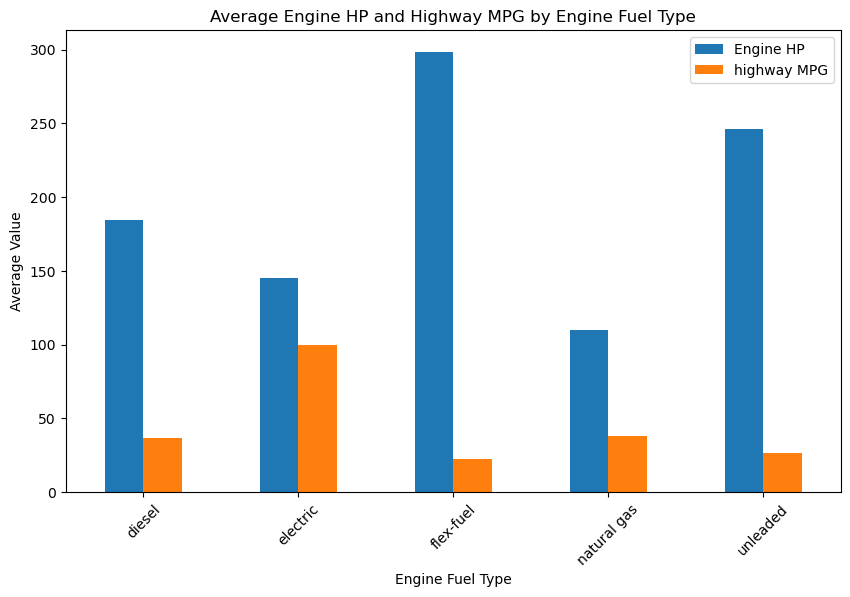

In [34]:
data = df.groupby(["Engine Fuel Type"])[["Engine HP", "highway MPG"]].mean()

fig, ax = plt.subplots(figsize=(10, 6))
data.plot(kind='bar', ax=ax)
ax.set_xlabel("Engine Fuel Type")
ax.set_ylabel("Average Value")
ax.set_title("Average Engine HP and Highway MPG by Engine Fuel Type")
plt.xticks(rotation=45)
plt.show()


**The bar plot shows the average values of engine horsepower (Engine HP) and highway miles per gallon (highway MPG) for different engine fuel types.**

**From the plot, we can observe that:**

- Diesel fuel type has the highest average engine horsepower and highway MPG.
- Flex-fuel and premium gas (recommended) fuel types have relatively lower average engine horsepower but higher highway MPG compared to the other fuel types.
- Unleaded fuel types have a moderate range of average engine horsepower and highway MPG.

**This suggests that the choice of engine fuel type can have an impact on the performance and fuel efficiency of the vehicles.**

## 4.14  The engine configuration (including other attributes) of the vehicle with the highest number of engine cylinders

In [35]:
fig = px.histogram(df, x="Engine Cylinders", title='Engine cylinders',)
fig.show()

**On this graph, we can see that there are still cars with up to 16 cylinders in their composition. Let's have a look at such a car.**

In [36]:
index = np.argmax(df['Engine Cylinders'])
df.loc[index,:]

Company                              Bugatti
Model                            Veyron 16.4
Year                                    2008
Engine Fuel Type                    unleaded
Engine HP                             1001.0
Engine Cylinders                        16.0
Transmission Type           AUTOMATED_MANUAL
Driven_Wheels                all wheel drive
Number of Doors                          2.0
Market Category      Exotic,High-Performance
Vehicle Size                         Compact
Vehicle Style                          Coupe
highway MPG                               14
city mpg                                   8
Popularity                               820
Price                                2065902
Name: 11362, dtype: object

**It turns out that this is the same car responsible of the high variance observed in 2008. Now I will check whether the most expensive car is also the one having most cylinders and the most Engine Horse Power.**

## 4.15  The distribution of transmission types in the dataset, and which transmission type is the most prevalent

In [37]:
data_pie = df['Transmission Type'].value_counts()

# Plot
fig = go.Figure(data=[go.Pie(labels=data_pie.index, values=data_pie.tolist(), textinfo='label+percent',
                             insidetextorientation='radial'
                            )])

fig.update_traces(hole=.3, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pie chart of transmission type")

fig.show()

**Almost 70% of cars are automatic. For decades automatic transmission have been considered much more convenient in the USA than in Europe. The American car industry was more competitive, with more powerful engines and cheap fuel.**

## 4.16 The distribution of driven wheel types in the dataset, and which wheel type is the most prevalent

In [38]:
data_pie = df['Driven_Wheels'].value_counts()

# Plot
fig = go.Figure(data=[go.Pie(labels=data_pie.index, values=data_pie.tolist(), textinfo='label+percent',
                             insidetextorientation='radial'
                            )])

fig.update_traces(hole=.3, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pie chart of driven wheels variable")

fig.show()

**The pie chart provides a visual representation of the distribution of driven wheel types in the dataset.**

- Front-wheel drive (FWD) is the most common driven wheel type, comprising a significant portion of the vehicles in the dataset.
- Rear-wheel drive (RWD) has a noticeable but comparatively smaller representation.
- All-wheel drive (AWD) and four-wheel drive (4WD) have a relatively smaller presence in the dataset.

**The chart allows us to quickly understand the relative proportions of different driven wheel types and identify the dominant type in the dataset.**

## 4.17  The distribution of the prices in the dataset, and how does it differ from a normal distribution

In [39]:
data = np.log10(df.Price)

# Plot
fig = ff.create_distplot([data], ['G1'], bin_size=.05,
                         curve_type='normal',
                         show_rug=False,
                         show_curve=False,
                         histnorm='probability')

fig.update_layout(title_text='Price Distribution',
                  xaxis_title="Price")

fig.show()

**We retrieve the peak around 2000 USD and a slightly left skewed normal distribution after 10k USD.**

In [40]:
# Some observations
print(sum(df['Price']>400000),"cars worth more than 400k$")
print(sum(df['Price']>200000),"cars worth more than 200k$")
print(sum(df['Price']>50000),"cars worth more than 50k$")
print("Most expensive car costs", max(df['Price']))
print("There are",sum(df['Price']<5000),"cars worth less than 5k$")

46 cars worth more than 400k$
279 cars worth more than 200k$
1999 cars worth more than 50k$
Most expensive car costs 2065902
There are 1611 cars worth less than 5k$


## 4.18 The count of cars sold for less than $5000 vary across different years, and is there any correlation with the mean price of cars per year

In [41]:
below_5k_per_year_mean = df.loc[df['Price'] < 5000].groupby('Year')['Price'].mean(numeric_only=True)
below_5k_per_year_count = df.loc[df['Price'] < 5000].groupby('Year')['Price'].count()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=below_5k_per_year_mean.index,
               y=below_5k_per_year_mean,
               name="Mean Price per year",
               marker_color='black'),
    secondary_y=True,
)

fig.add_trace(go.Bar(
    x=below_5k_per_year_count.index,
    y=below_5k_per_year_count,
    name='Count cars per year',
    marker_color='blue'
))

fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="<b>Count</b> cars", secondary_y=False)
fig.update_yaxes(title_text="<b>Mean MSRP</b> (in USD)", secondary_y=True)

fig.update_layout(barmode='group',
                  xaxis_tickangle=-45,
                  title_text='Age of less than 5k USD sold cars')

fig.show()


**This graph shows an increase in the average price of the MRSP, as seen at the beginning of this notebook. It also shows the number of car models sold per year of marketing. It is also noted that on the x-axis, no models marketed after the 2000s appear.**

## 4.19 The proportion of the number of doors differ between vehicles with more than 4 cylinders and vehicles with less than 4 cylinders

In [42]:
more_than_4_cyl = df[df['Engine Cylinders']>4]
less_than_4_cyl = df[~(df['Engine Cylinders']>4)]
fig = go.Figure()

fig.add_trace(go.Bar(
    x=more_than_4_cyl['Number of Doors'].value_counts().index,
    y=(more_than_4_cyl['Number of Doors'].value_counts()/sum(more_than_4_cyl['Number of Doors'].value_counts())).tolist(),
    name='Number of doors for vehicles with more than 4 cylidners',
    marker_color='darkblue'
))

fig.add_trace(go.Bar(
    x=less_than_4_cyl['Number of Doors'].value_counts().index,
    y=(less_than_4_cyl['Number of Doors'].value_counts()/sum(less_than_4_cyl['Number of Doors'].value_counts())).tolist(),
    name='Number of doors for vehicles with less than 4 cylidners',
    marker_color='lightblue'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title_text='Proportion of Number of Doors')
fig.show()

**According to this histogram, the number of doors is lower for vehicles having more than 4 cylinders. It might be due to the fact that a vehicle which has more cylinders is more likely to be a racing or sport car. Such cars need to be as light as possible to impreove the motor yield.**

# 5. Conclusion

**To draw a conclusion from an EDA, one typically analyzes various aspects of the dataset, such as data distribution, relationships between variables, statistical summaries, and visualizations. By examining these factors, one can gain insights and make conclusions about the dataset.**

# <center>THANK YOU</center>